In [4]:
import pandas as pd
import numpy as np
import math

#DATA_PATH = "/Users/mvonebers/HUBBS-Lab/data/"
DATA_PATH = "/home/maggie/HUBBS-Lab/data/"

e4_data = pd.read_excel(DATA_PATH + "E4_TEST.xlsx")

e4_data.insert(0, "person", [0] * e4_data.shape[0])
e4_data.insert(1, "trial", [0] * e4_data.shape[0])

for i, row in e4_data.iterrows():
    e4_data.at[i, "person"] = int(e4_data.at[i, "id"][7:])
    e4_data.at[i, "trial"] = int(e4_data.at[i, "id"][5])
    
e4_data = e4_data.drop(columns=['id'])
e4_data = e4_data.rename(columns={"person": "id"})

change_data = pd.read_excel(DATA_PATH + "normalized_change.xlsx")

e4_data_results = pd.merge(e4_data, change_data, on='id')
e4_data_results

ids = set()
for i in range(e4_data.shape[0]):
    ids.add(e4_data.iloc[i, 0])
    
#print(len(ids))
e4_data_results

,id,trial,EDA_PPT,HR_PPT,TEMP_PPT,BVP_PPT,ACC_PPT,IBI_PPT,EDA_FREQ_PPT,EDA_AMP_PPT,Brief fear of Negative Evaluation,CAI Trait Dyadic Score,CAI Trait Full Score,CAI Trait Public Speaking Score,CAI Trait Small group Score,STAI Trait Score,CAI State Score,STAI State Score
0,4,1,0.205970,82.376250,31.404085,0.013278,64.812218,0.882853,7.181628,0.012059,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
1,4,2,0.206435,105.666378,31.331652,-0.132812,65.118669,0.859414,7.312119,0.012054,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
2,4,3,0.212655,75.010328,30.183614,-0.111220,64.876459,0.921917,7.685270,0.012726,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
3,4,4,0.191278,92.559115,29.766569,-0.046831,64.844329,1.171929,6.262231,0.010277,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
4,4,5,0.154794,79.935382,29.652207,0.029759,62.817997,1.187555,2.574713,0.010306,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
5,4,6,0.131103,69.976339,28.489687,-0.001057,63.517451,0.927365,0.536913,0.012226,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
6,4,7,0.221141,72.407584,27.779962,0.002222,63.135293,0.834022,0.551724,0.031166,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
7,4,8,0.235911,70.961925,27.479961,0.039489,63.190300,0.808073,1.120623,0.008137,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
8,5,1,1.398084,92.092074,32.617098,-0.001293,65.803129,0.610225,11.653179,0.144946,0.388889,0.166667,0.121212,0.100000,0.090909,0.025641,0.300000,0.090909
9,5,2,0.475566,84.963252,32.318491,-0.054704,65.578315,0.714732,5.871560,0.070066,0.388889,0.166667,0.121212,0.100000,0.090909,0.025641,0.300000,0.090909


In [5]:
"""
Collect all possible slopes (trial 8 - trial 1)
"""
col = ["id", "trial", "EDA_PPT", "HR_PPT", "TEMP_PPT", "BVP_PPT", "ACC_PPT", 
           "IBI_PPT", "EDA_FREQ_PPT", "EDA_AMP_PPT", "Brief fear of Negative Evaluation",
           "CAI Trait Dyadic Score", "CAI Trait Full Score", "CAI Trait Public Speaking Score", 
           "CAI Trait Small group Score", "STAI Trait Score", "CAI State Score", "STAI State Score"]

slopes = pd.DataFrame(np.zeros((160, 18)), columns=col)
slopes = slopes.drop(["trial"], axis=1)
    
first = [0] * 8
for i in range(e4_data_results.shape[0]):
    if e4_data_results.iloc[i, 1] == 1:
        for j in range(2,10):
            first[j - 2] = e4_data_results.iloc[i, j]
    elif e4_data_results.iloc[i, 1] == 8:
        for j in range(2,10):
            #print(i, j)
            slopes.iloc[i, 0] = e4_data_results.iloc[i, 0]
            for k in range(9, 17):
                slopes.iloc[i, k] = e4_data_results.iloc[i, k + 1]
            if not math.isnan(e4_data_results.iloc[i, j]) and not math.isnan(first[j - 2]):
                slopes.iloc[i,j - 1] = e4_data_results.iloc[i, j] - first[j - 2] / 8
            else:
                slopes.iloc[i, j - 1] = 0
            
index_names = slopes[ slopes['id'] == 0 ].index
slopes.drop(index_names, inplace=True)

slopes.replace(0, np.NaN, inplace=True)
slopes

,id,EDA_PPT,HR_PPT,TEMP_PPT,BVP_PPT,ACC_PPT,IBI_PPT,EDA_FREQ_PPT,EDA_AMP_PPT,Brief fear of Negative Evaluation,CAI Trait Dyadic Score,CAI Trait Full Score,CAI Trait Public Speaking Score,CAI Trait Small group Score,STAI Trait Score,CAI State Score,STAI State Score
7,4.0,0.210164,60.664894,23.554450,0.037829,55.088773,0.697716,0.222919,0.006630,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
15,5.0,0.444626,63.212511,25.405799,-0.055597,57.430220,0.614378,5.373883,0.073715,0.388889,0.166667,0.121212,0.100000,0.090909,0.025641,0.300000,0.090909
23,8.0,0.381983,72.302272,29.130058,-0.075223,57.577599,0.724642,3.257187,0.009408,0.089286,0.133333,0.128205,0.166667,0.083333,0.155172,0.187500,0.068182
31,20.0,-0.103883,85.766964,27.464529,-0.020019,56.391233,0.953169,14.729787,0.005928,0.272727,NaN,0.043478,0.125000,NaN,0.040000,-0.037037,-0.047619
39,21.0,-0.095482,78.963769,29.065740,0.017702,55.473673,0.445426,-0.779171,-0.045754,0.117647,0.312500,0.121212,-0.111111,NaN,0.114286,0.380952,0.512195
47,23.0,0.117118,73.496043,25.305126,-0.010327,55.741410,0.917453,4.563054,0.005931,-0.111111,NaN,0.066667,0.250000,-0.058824,0.100000,0.205128,0.230769
55,32.0,-0.088614,58.701567,28.561196,0.023527,55.746192,NaN,-1.675824,-0.004815,0.486486,0.375000,0.272727,0.470588,-0.181818,-0.214286,0.274510,0.125000
63,35.0,1.632557,77.821916,29.437755,0.073159,56.364890,0.651071,9.164304,0.158474,0.333333,-0.142857,NaN,NaN,0.125000,-0.068966,0.258065,0.050000
71,37.0,0.032494,80.075242,23.888878,0.084808,55.412272,NaN,1.518812,0.005851,-0.551724,0.176471,0.025641,-0.100000,-0.083333,-0.107143,0.302326,0.045455
79,41.0,0.277439,66.333266,27.803641,0.003895,57.982554,NaN,3.064312,0.007803,0.200000,0.217391,0.138462,0.136364,0.050000,NaN,0.263158,-0.555556


NameError: name 'x_i' is not defined

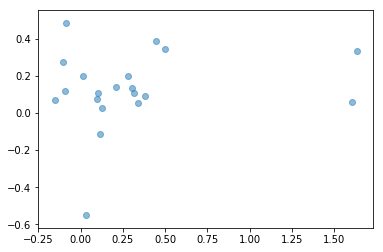

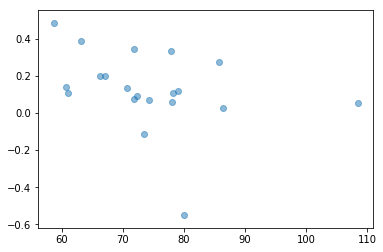

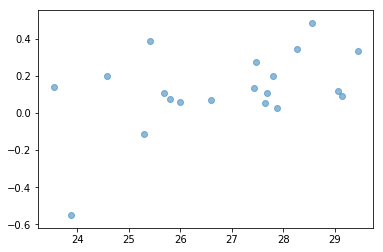

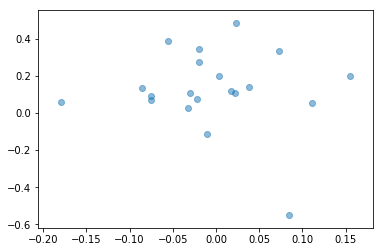

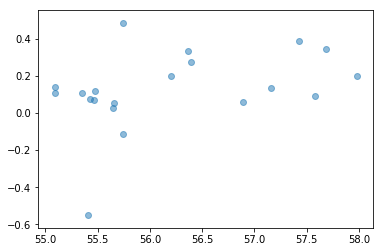

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(42)


N = 50
x_eda = slopes['EDA_PPT'].to_numpy(copy=True)
x_hr = slopes['HR_PPT'].to_numpy(copy=True)
x_temp = slopes['TEMP_PPT'].to_numpy(copy=True)
x_bvp = slopes['BVP_PPT'].to_numpy(copy=True)
x_acc = slopes['ACC_PPT'].to_numpy(copy=True)
x_ibi = slopes['IBI_PPT'].to_numpy(copy=True)
y = slopes['Brief fear of Negative Evaluation'].to_numpy(copy=True)

f1 = plt.figure(1)
plt.scatter(x_eda, y, alpha=0.5)
f2 = plt.figure(2)
plt.scatter(x_hr, y, alpha=0.5)
f3 = plt.figure(3)
plt.scatter(x_temp, y, alpha=0.5)
f4 = plt.figure(4)
plt.scatter(x_bvp, y, alpha=0.5)
f5 = plt.figure(5)
plt.scatter(x_acc, y, alpha=0.5)
f6 = plt.figure(6)
plt.scatter(x_i)

plt.show()

In [7]:
# start at 60-40 and if it's inconsistent, then slowly increase slowly towards 80-20 but don't go past that

# Modified for Oct. 21st checkpoint to collect scores and put in a table

# Oct. 28th checkpoint get p-values

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from scipy import stats

Y_BFNE = slopes['Brief fear of Negative Evaluation'].to_numpy(copy=True)

k = 0

predicted = slopes.copy(deep=True)

for col in slopes.columns:
    if col == 'id':
        continue
    if col == 'Brief fear of Negative Evaluation':
        break
    print(col)
    X_before = slopes[col].to_numpy(copy=True)
    Y_before = slopes['Brief fear of Negative Evaluation'].to_numpy(copy=True)
    X = np.array([])
    Y = np.array([])
    for i in range(len(X_before)):  # remove NaN from data
        if not math.isnan(X_before[i]) and not math.isnan(Y_before[i]):
            X = np.append(X, X_before[i])
            Y = np.append(Y, Y_before[i])
    
    X = X.reshape(-1, 1)
    lm = LinearRegression()
    lm.fit(X,Y)
    params = np.append(lm.intercept_,lm.coef_)
    predictions = lm.predict(X)

    newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
    MSE = (sum((Y-predictions)**2))/(len(newX)-len(newX.columns))

    # Note if you don't want to use a DataFrame replace the two lines above with
    # newX = np.append(np.ones((len(X),1)), X, axis=1)
    # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4)

    myDF3 = pd.DataFrame()
    myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
    print(myDF3)
     
        
"""model = LinearRegression()
    cv = KFold(10, shuffle=True, random_state=41)
    predicts = cross_val_predict(model, X.reshape(-1,1), Y, cv=cv)
    
    for _, test in cv.split(X):
        for pred, test_index in zip(predicts, test):
            predicted.at[test_index,col] = pred
            
# do this for all of the traits not just BFNE

#correlations_BFNE = []

print("---------- Correlations ----------")   
for j in range(9, len(predicted.columns)):
    Y_0 = np.array(predicted[predicted.columns[j]][:20])
    for i in range(1, 9):
        print(predicted.columns[i], "vs." , predicted.columns[j], ":")
        X_0 = np.array(predicted[predicted.columns[i]][:20])
        X = []
        Y = []
        for i in range(len(X_0)):
            if not (math.isnan(X_0[i]) or math.isnan(Y_0[i])):
                X.append(X_0[i])
                Y.append(Y_0[i])

        correlation = np.corrcoef(X, Y)[0][1]
        #print(correlation)
        #correlations_BFNE.append(correlation)"""
    
#predicted
#plt.show()
# some notable correlations:
# * EDA_PPT vs. CAI Trait Full Score : 0.23216250036705188
# * EDA_FREQ_PPT vs. CAI Trait Full Score : 0.18947315542233634
# * EDA_FREQ_PPT vs. CAI Trait Public Speaking Score : 0.21350034134581444
# * EDA_PPT vs. CAI Trait Small group Score : 0.590551086671041
# * EDA_FREQ_PPT vs. CAI Trait Small group Score : 0.6218508358580933
# * EDA_AMP_PPT vs. CAI Trait Small group Score : 0.3619892407906545
# * EDA_PPT vs. STAI Trait Score : 0.31234968134619207
# * IBI_PPT vs. STAI Trait Score : 0.33955692294262746

# get significant values from correlations
#try combinations like acoustics, etc and then all together

EDA_PPT
   Coefficients  Standard Errors  t values  Probabilites
0        0.1056            0.057     1.842         0.081
1        0.0718            0.102     0.706         0.489
HR_PPT
   Coefficients  Standard Errors  t values  Probabilites
0        0.5970            0.316     1.892         0.074
1       -0.0063            0.004    -1.504         0.149
TEMP_PPT
   Coefficients  Standard Errors  t values  Probabilites
0       -1.3883            0.686    -2.025         0.057
1        0.0564            0.025     2.215         0.039
BVP_PPT
   Coefficients  Standard Errors  t values  Probabilites
0        0.1265            0.049     2.585         0.018
1       -0.2414            0.664    -0.364         0.720
ACC_PPT
   Coefficients  Standard Errors  t values  Probabilites
0       -4.6971             2.79    -1.683         0.109
1        0.0859             0.05     1.729         0.100
IBI_PPT
   Coefficients  Standard Errors  t values  Probabilites
0        0.2221            0.166     1.3

'model = LinearRegression()\n    cv = KFold(10, shuffle=True, random_state=41)\n    predicts = cross_val_predict(model, X.reshape(-1,1), Y, cv=cv)\n    \n    for _, test in cv.split(X):\n        for pred, test_index in zip(predicts, test):\n            predicted.at[test_index,col] = pred\n            \n# do this for all of the traits not just BFNE\n\n#correlations_BFNE = []\n\nprint("---------- Correlations ----------")   \nfor j in range(9, len(predicted.columns)):\n    Y_0 = np.array(predicted[predicted.columns[j]][:20])\n    for i in range(1, 9):\n        print(predicted.columns[i], "vs." , predicted.columns[j], ":")\n        X_0 = np.array(predicted[predicted.columns[i]][:20])\n        X = []\n        Y = []\n        for i in range(len(X_0)):\n            if not (math.isnan(X_0[i]) or math.isnan(Y_0[i])):\n                X.append(X_0[i])\n                Y.append(Y_0[i])\n\n        correlation = np.corrcoef(X, Y)[0][1]\n        #print(correlation)\n        #correlations_BFNE.appen

EDA_PPT
Testing with 9 % -0.5151532081393357
HR_PPT
Testing with 9 % -0.231032732084536
TEMP_PPT
Testing with 9 % -0.49786306694279125
BVP_PPT
Testing with 9 % -0.14851005574981668
ACC_PPT
Testing with 9 % -0.3265116939586703
IBI_PPT
Testing with 9 % -0.09638242692131316
EDA_FREQ_PPT
Testing with 9 % 0.01723293496680378
EDA_AMP_PPT
Testing with 9 % -0.07384714606017906


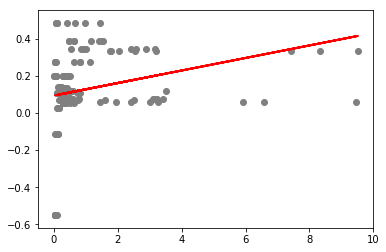

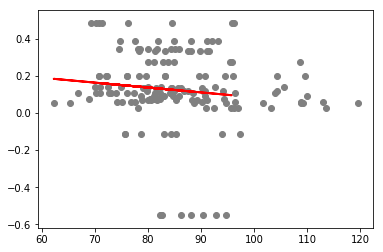

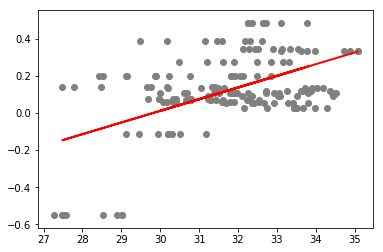

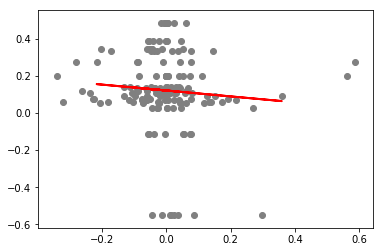

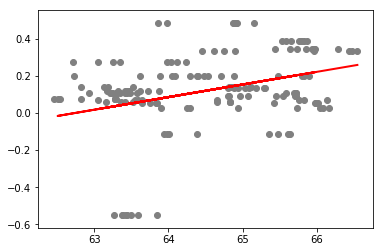

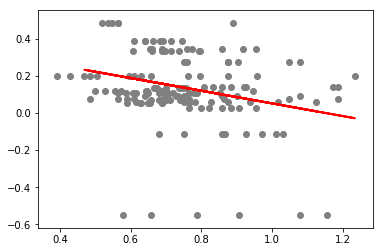

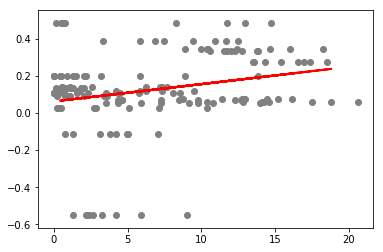

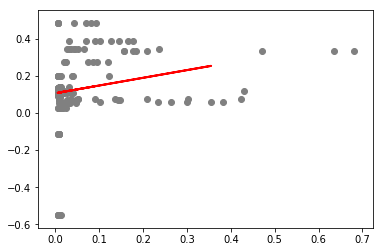

In [8]:
# Trying again with just the raw data instead of the slopes...not sure how that's gonna go
k = 0



for col in e4_data_results.columns:
    if col == 'id' or col == 'trial':
        continue
    if col == 'Brief fear of Negative Evaluation':
        break
    print(col)
    X_before = e4_data_results[col].to_numpy(copy=True)
    Y_before = e4_data_results['Brief fear of Negative Evaluation'].to_numpy(copy=True)
    X = np.array([])
    Y = np.array([])
    for i in range(len(X_before)):  # remove NaN from data
        if not math.isnan(X_before[i]) and not math.isnan(Y_before[i]):
            X = np.append(X, X_before[i])
            Y = np.append(Y, Y_before[i])
            
    #for j in range(50, 10, -2):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=25)
    reg = LinearRegression().fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))
    print("Testing with",j,"%", reg.score(X_test.reshape(-1, 1), Y_test.reshape(-1, 1)))
    pred = reg.predict(X_test.reshape(-1,1))
    f1 = plt.figure(k)
    plt.scatter(X, Y,  color='gray')
    plt.plot(X_test, pred, color='red', linewidth=2)
    
    k += 1
    
plt.show()

In [9]:
# To do for Monday, Oct. 7th
# cross validation with 10% - done above for slopes
# collect predicted values for all tests and compute correlation vs those and actual values
# trials as seperate features
# feed all 8 trials as feature

Y = slopes['Brief fear of Negative Evaluation'].to_numpy(copy=True)

columns = list(e4_data_results.columns.values)

for i in range(2, 10):
    # Collect X for each column, with each trial as a feature
    X_0 = []
    X_row = []
    for j in range(e4_data_results.shape[0]):
        if math.isnan(e4_data_results.iloc[j, i]): # if NaN, take another value from a different trial
            X_row.append(0)
        else:
            X_row.append(e4_data_results.iloc[j, i])

        if e4_data_results.at[j, "trial"] == 8:
            X_0.append(X_row)
            X_row = []
            
    X = np.array(X_0)
    print(X[0], Y[0])
    
    model = LinearRegression()
    cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
    scores = cross_val_score(model, X, Y, cv=cv)
    print(columns[i], scores)
    print("Average:", np.average(scores))
    print()
    #X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=25)
    #reg = LinearRegression().fit(X_train, Y_train)
    #print(columns[i], reg.score(X_test, Y_test))
    
    # use correlation instead of default scorer

[0.20596962 0.20643509 0.21265476 0.19127845 0.15479406 0.13110307
 0.22114062 0.23591062] 0.1379310344827586
EDA_PPT [-4.78717319e+00 -1.14991510e+01 -3.12822391e+05 -4.61307119e-01
 -2.52077168e+03 -2.49772314e+00 -2.35478425e+00 -2.91708543e+00
 -4.41419664e+01 -9.81991926e-01]
Average: -31541.280419216317

[ 82.37625    105.66637838  75.01032847  92.55911458  79.93538226
  69.97633929  72.4075841   70.96192547] 0.1379310344827586
HR_PPT [-3.58163435e+00 -3.48619134e-01 -1.40290688e+03 -2.17064234e+01
 -8.57436759e+01  2.89674959e-01 -2.94733087e+02 -4.52753311e+01
 -6.17037855e+01 -6.67941064e+02]
Average: -258.3650822169281

[31.4040849  31.331652   30.18361391 29.76656882 29.6522069  28.4896868
 27.77996169 27.47996109] 0.1379310344827586
TEMP_PPT [   -6.89055035    -1.59697804  -192.40249098  -170.69637107
   -48.85897294    -1.58421488 -1219.99560646   -57.16009086
   -29.04802256  -453.8790691 ]
Average: -218.21123672480445

[ 0.0132785  -0.13281238 -0.1112196  -0.04683107  0.

In [6]:
for i in range(2, 10):
    # Collect X for each column, with each trial as a feature
    X_0 = []
    X_row = []
    for j in range(e4_data_results.shape[0]):
        if math.isnan(e4_data_results.iloc[j, i]): # if NaN, take another value from a different trial
            X_row.append(0)
        else:
            X_row.append(e4_data_results.iloc[j, i])

        if e4_data_results.at[j, "trial"] == 8:
            X_0.append(X_row)
            X_row = []
            
    X = np.array(X_0)
    
    model = LinearRegression()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=50)
    reg = model.fit(X_train, Y_train)
    predict = reg.predict(X_test)
    
    print(columns[i], np.corrcoef(predict, Y_test)[0][1])

EDA_PPT -0.04343226185486706
HR_PPT 0.14461114267094322
TEMP_PPT 0.7195961428514247
BVP_PPT 0.19465834650483094
ACC_PPT 0.16458540101912236
IBI_PPT -0.4765407205002237
EDA_FREQ_PPT -0.5571901345414663
EDA_AMP_PPT -0.18481119423451495


In [10]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

#Y = slopes['Brief fear of Negative Evaluation'].to_numpy(copy=True)

columns = list(e4_data_results.columns.values)

def scorer(y, y_p):
    return np.corrcoef(y_p, y)[1][0]

for index in range(10, len(columns)):
    Y_1 = slopes[columns[index]].to_numpy(copy=True)
    print("-------------", columns[index], "-------------")
    for i in range(2, 10):
        # Collect X for each column, with each trial as a feature
        X_0 = []
        X_row = []
        for j in range(e4_data_results.shape[0]):
            if math.isnan(e4_data_results.iloc[j, i]): # if NaN, take another value from a different trial
                X_row.append(0)
            else:
                X_row.append(e4_data_results.iloc[j, i])

            if e4_data_results.at[j, "trial"] == 8:
                X_0.append(X_row)
                X_row = []

        X_1 = np.array(X_0)
        X = []
        Y = []
        for k in range(len(X_1)):
            if not math.isnan(Y_1[k]):
                X.append(X_1[k])
                Y.append(Y_1[k])
                
        #print(X_1)
        model = LinearRegression()
        cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
        scores = cross_val_score(model, X, Y, scoring=make_scorer(scorer), cv=cv)
        print(columns[i], scores)
        print("Average:", np.average(scores))
        print("Standard dev:", np.std(scores))
        print()
        #X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=25)
        #reg = LinearRegression().fit(X_train, Y_train)
        #print(columns[i], reg.score(X_test, Y_test))
    
    
    # use correlation instead of default scorer

------------- Brief fear of Negative Evaluation -------------
EDA_PPT [-0.83487281 -0.90808068  0.18868763 -0.13617651  0.29105022  0.01169638
 -0.01577298  0.41823595  0.4338947   0.56443246]
Average: 0.0013094366789603517
Standard dev: 0.48400607338573776

HR_PPT [ 0.5663172   0.59915334 -0.79100374  0.86094802 -0.65346069  0.88051504
  0.90932018 -0.85818658 -0.31616814 -0.34758497]
Average: 0.08498496530099812
Standard dev: 0.7043320573884961

TEMP_PPT [ 0.76172817 -0.24436965 -0.53533729 -0.99365183 -0.1526365   0.90797731
 -0.26419968  0.42550315  0.62337802 -0.72284078]
Average: -0.01944490923366987
Standard dev: 0.6260806095643798

BVP_PPT [-0.93521855  0.00718266  0.06312498  0.27168741  0.92903154  0.58124525
 -0.30849613  0.41958678 -0.16068318  0.38634686]
Average: 0.12538076219351418
Standard dev: 0.4942198243175945

ACC_PPT [ 0.55048674 -0.05927025 -0.68667037 -0.99094834  0.0618513  -0.48280083
 -0.72493436 -0.16247825  0.38976055  0.16970296]
Average: -0.193530085797592

HR_PPT [-0.37586675 -0.43163718  0.27787503 -0.59691969  0.05072056  0.170691
 -0.53467687 -0.99634539  0.58173309  0.35047131]
Average: -0.15039549009041836
Standard dev: 0.48025629635920647

TEMP_PPT [ 0.35494324  0.55059321 -0.26592406  0.9159303  -0.78673564  0.97290412
 -0.74775965 -0.28832619 -0.46441328  0.64172429]
Average: 0.08829363563581752
Standard dev: 0.6400066788857671

BVP_PPT [ 0.6082296   0.07268917 -0.44993371  0.81542427 -0.7381836  -0.38888528
  0.63987739  0.99393355 -0.93418263  0.29236177]
Average: 0.09113305463775531
Standard dev: 0.6489374449081313

ACC_PPT [-0.86154055 -0.83869474  0.68650342 -0.96661596 -0.24421266 -0.69992957
  0.23574475 -0.58475918 -0.29277781 -0.9472395 ]
Average: -0.45135217973898734
Standard dev: 0.5238461666300607

IBI_PPT [-0.52747722  0.0729418  -0.7464356  -0.95833171  0.36344912 -0.86553282
 -0.46902207 -0.90673002  0.37485695 -0.57746331]
Average: -0.4239744894079112
Standard dev: 0.48568917932926153

EDA_FREQ_PPT [ 0.03720794  0

In [11]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

X = []

correlations = []

for index, row in slopes.iterrows():
    my_list = [row.EDA_PPT, row.HR_PPT, row.TEMP_PPT, row.BVP_PPT, row.ACC_PPT, row.IBI_PPT, row.EDA_FREQ_PPT, row.EDA_AMP_PPT]
    X.append(my_list)
        

for index in range(10, len(columns)):
    Y_1 = slopes[columns[index]].to_numpy(copy=True)
    print("-------------", columns[index], "-------------")  
    Y = []
    X = []
    for i in range(len(Y_1)):
        if not math.isnan(Y_1[i]):
            isnan = False
            for j in range(len(X_1[i])):
                if math.isnan(X_1[i][j]):
                    isnan = True
                    break
            if not isnan:
                Y.append(Y_1[i])
                X.append(X_1[i])
    
    model = LinearRegression()
    cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
    #scores = cross_val_score(model, X, Y, scoring=make_scorer(scorer), cv=cv)
    
    corr = []
    for score in scores:
        corr.append(score)
    correlations.append(corr)    
    
    print(scores)
    print("Average:", np.average(scores))
    print("Standard dev:", np.std(scores))
    print()
    
# "Correlations" variable holds the scores for each set of features (i.e. each row from table "slopes") 
# for each of the Y sets

# did they want the score for each individual slope instead?

------------- Brief fear of Negative Evaluation -------------
[ 0.18124326  0.87410605  0.87271241 -0.42839825  0.24751528  0.84611155
  0.5951216   0.48408284  0.22758281  0.46564316]
Average: 0.4365720715188556
Standard dev: 0.38345830929657315

------------- CAI Trait Dyadic Score -------------
[ 0.18124326  0.87410605  0.87271241 -0.42839825  0.24751528  0.84611155
  0.5951216   0.48408284  0.22758281  0.46564316]
Average: 0.4365720715188556
Standard dev: 0.38345830929657315

------------- CAI Trait Full Score -------------
[ 0.18124326  0.87410605  0.87271241 -0.42839825  0.24751528  0.84611155
  0.5951216   0.48408284  0.22758281  0.46564316]
Average: 0.4365720715188556
Standard dev: 0.38345830929657315

------------- CAI Trait Public Speaking Score -------------
[ 0.18124326  0.87410605  0.87271241 -0.42839825  0.24751528  0.84611155
  0.5951216   0.48408284  0.22758281  0.46564316]
Average: 0.4365720715188556
Standard dev: 0.38345830929657315

------------- CAI Trait Small grou

In [66]:
# get significant values from correlations
#try combinations like acoustics, etc and then all together
from copy import deepcopy


DATA_PATH = "/home/maggie/HUBBS-Lab/data/"
audio_data = pd.read_excel(DATA_PATH + "audio_TEST.xlsx")

audio_data.insert(0, "person", [0] * audio_data.shape[0])
audio_data.insert(1, "trial", [0] * audio_data.shape[0])

for i, row in audio_data.iterrows():
    audio_data.at[i, "person"] = int(audio_data.at[i, "id"][7:])
    audio_data.at[i, "trial"] = int(audio_data.at[i, "id"][5])
    
audio_data = audio_data.drop(columns=['id'])
audio_data = audio_data.rename(columns={"person": "id"})
#audio_data.head(20)
audio_data = audio_data[audio_data.id != 16]
audio_data = audio_data[audio_data.id != 38]
audio_data = audio_data[audio_data.id != 46]
audio_data = audio_data[audio_data.id != 53]
audio_data = audio_data[audio_data.id != 58]
audio_data = audio_data[audio_data.id != 65]

audio_data.tail(10)

,id,trial,pcm_RMSenergy_sma_amean,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[7]_amean,...,voiceProb_sma_amean,F0_sma_amean,#pause,pause_frequency,pause_interval,mean,percent,jitterLocal_sma_amean,jitterDDP_sma_amean,shimmerLocal_sma_amean
190,71,7,0.019268,-5.464840,-1.677143,-3.731048,-13.945176,11.084735,-16.204940,-5.270096,...,0.385889,29.619966,10,1.000000,0.380002,0.380002,0.013375,0.039192,0.038492,0.179200
191,71,8,0.014699,-4.789168,-2.596703,-4.642866,-8.386762,7.316568,-16.358901,-3.011646,...,0.389939,38.486869,13,1.666667,0.486430,0.488462,0.026450,0.050178,0.054862,0.185293
192,73,1,0.021354,-3.869669,-2.995199,-1.992865,-8.976619,9.272662,-21.864481,-2.534097,...,0.385274,27.532096,21,4.600000,0.575909,0.539523,0.077772,0.043829,0.041825,0.163241
193,73,2,0.020444,-4.508407,-3.635783,-1.156314,-8.473658,6.496032,-23.383454,-1.960249,...,0.378631,24.114596,22,4.600000,0.460909,0.460909,0.070319,0.043633,0.043220,0.162912
194,73,3,0.022141,-6.966793,-3.442923,-0.930959,-8.589370,7.619988,-20.927729,-1.429203,...,0.356084,15.820787,14,4.000000,0.788948,0.660000,0.072896,0.036371,0.036419,0.146835
195,73,4,0.016747,-5.346863,-4.401036,-1.772596,-6.538305,5.228556,-17.409770,-3.816441,...,0.392373,36.804344,17,3.000000,0.434706,0.434706,0.044788,0.049216,0.049664,0.164615
196,73,5,0.019861,-6.544580,-0.529959,-4.315085,-7.491222,9.523307,-22.557555,-2.752085,...,0.357874,18.478564,13,3.400000,0.400624,0.419999,0.041188,0.035734,0.035042,0.178205
197,73,6,0.023864,-6.224142,-1.605599,-4.598936,-8.447270,9.679458,-22.852172,-0.745983,...,0.374399,24.783046,25,3.000000,0.405002,0.414002,0.041874,0.041190,0.044725,0.168997
198,73,7,0.019280,-6.070041,-1.986066,-4.606451,-5.151283,6.730979,-23.007388,-1.617074,...,0.377308,31.703048,12,2.600000,0.561666,0.561666,0.045762,0.046048,0.049646,0.182580
199,73,8,0.018839,-5.079182,-1.334333,-3.884128,-7.937570,9.279237,-19.915600,-4.012684,...,0.390606,33.063215,21,3.833333,0.494545,0.495238,0.059602,0.044709,0.044819,0.165960


In [67]:
# Collect slopes
audio_slopes = pd.DataFrame(np.zeros((audio_data.shape[0], audio_data.shape[1])), columns=audio_data.columns)

first = [0] * audio_data.shape[1]
for i in range(audio_data.shape[0]):
    if audio_data.iloc[i, 1] == 1:
        for j in range(1,audio_data.shape[1]):
            first[j] = audio_data.iloc[i, j]
    elif audio_data.iloc[i, 1] == 8:
        for j in range(1,audio_data.shape[1]):
            #print(i, j)
            audio_slopes.iloc[i, 0] = audio_data.iloc[i, 0] # copy ID over
            if not math.isnan(audio_data.iloc[i, j]) and not math.isnan(first[j]):
                audio_slopes.iloc[i,j] = (audio_data.iloc[i, j] - first[j]) / 8
            else:
                audio_slopes.iloc[i, j] = 0
            
index_names = audio_slopes[audio_slopes['id'] == 0 ].index
audio_slopes.drop(index_names, inplace=True)
audio_slopes = audio_slopes.drop(["trial"], axis=1)

audio_slopes.replace(0, np.NaN, inplace=True)

slopes = slopes[slopes.id != 66.0]

all_slopes = audio_slopes.merge(slopes, how='right', on='id')


all_slopes

,id,pcm_RMSenergy_sma_amean,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[8]_amean,...,EDA_FREQ_PPT,EDA_AMP_PPT,Brief fear of Negative Evaluation,CAI Trait Dyadic Score,CAI Trait Full Score,CAI Trait Public Speaking Score,CAI Trait Small group Score,STAI Trait Score,CAI State Score,STAI State Score
0,4.0,-0.000677,-0.904345,0.999772,-0.410458,-0.546460,-0.167588,1.300074,-0.689005,0.467692,...,0.222919,0.006630,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
1,5.0,-0.003122,0.007079,0.072979,0.320906,1.303058,-1.588763,1.729250,-0.149595,0.073337,...,5.373883,0.073715,0.388889,0.166667,0.121212,0.100000,0.090909,0.025641,0.300000,0.090909
2,8.0,0.000248,-0.521555,-0.181873,0.851215,-0.637473,-1.165516,0.501105,-0.241861,-0.049129,...,3.257187,0.009408,0.089286,0.133333,0.128205,0.166667,0.083333,0.155172,0.187500,0.068182
3,20.0,-0.002219,0.114146,-0.319243,0.794979,-0.074510,-0.005567,0.109905,0.707247,-0.359253,...,14.729787,0.005928,0.272727,NaN,0.043478,0.125000,NaN,0.040000,-0.037037,-0.047619
4,21.0,-0.000057,-0.107065,-0.305059,0.266342,-0.301706,0.126781,0.144786,-0.338524,0.128715,...,-0.779171,-0.045754,0.117647,0.312500,0.121212,-0.111111,NaN,0.114286,0.380952,0.512195
5,23.0,-0.001431,-0.043018,0.112024,0.265099,0.882863,-0.837569,1.750999,-0.115720,-0.549511,...,4.563054,0.005931,-0.111111,NaN,0.066667,0.250000,-0.058824,0.100000,0.205128,0.230769
6,32.0,-0.000762,0.329955,0.046428,0.777937,-0.753611,1.064646,0.531220,-0.208363,0.097895,...,-1.675824,-0.004815,0.486486,0.375000,0.272727,0.470588,-0.181818,-0.214286,0.274510,0.125000
7,35.0,-0.002019,0.217200,0.200935,-0.081724,0.103820,0.828762,-0.654147,-0.012018,0.033833,...,9.164304,0.158474,0.333333,-0.142857,NaN,NaN,0.125000,-0.068966,0.258065,0.050000
8,37.0,-0.000423,0.211642,0.217794,-0.229438,0.200463,0.098166,0.418655,-0.181980,-0.021601,...,1.518812,0.005851,-0.551724,0.176471,0.025641,-0.100000,-0.083333,-0.107143,0.302326,0.045455
9,41.0,-0.000429,-0.003997,-0.033436,0.709807,0.194683,-2.348933,0.936451,-0.285434,-1.132343,...,3.064312,0.007803,0.200000,0.217391,0.138462,0.136364,0.050000,NaN,0.263158,-0.555556


In [ ]:
Y_BFNE = slopes['Brief fear of Negative Evaluation'].to_numpy(copy=True)

k = 0

predicted = slopes.copy(deep=True)

for col in slopes.columns:
    if col == 'id':
        continue
    if col == 'Brief fear of Negative Evaluation':
        break
    #print(col)
    X_before = slopes[col].to_numpy(copy=True)
    Y_before = slopes['Brief fear of Negative Evaluation'].to_numpy(copy=True)
    X = np.array([])
    Y = np.array([])
    for i in range(len(X_before)):  # remove NaN from data
        if not math.isnan(X_before[i]) and not math.isnan(Y_before[i]):
            X = np.append(X, X_before[i])
            Y = np.append(Y, Y_before[i])
     
    model = LinearRegression()
    cv = KFold(10, shuffle=True, random_state=41)
    predicts = cross_val_predict(model, X.reshape(-1,1), Y, cv=cv)
    
    for _, test in cv.split(X):
        for pred, test_index in zip(predicts, test):
            predicted.at[test_index,col] = pred
            
# do this for all of the traits not just BFNE

#correlations_BFNE = []

print("---------- Correlations ----------")   
for j in range(9, len(predicted.columns)):
    Y_0 = np.array(predicted[predicted.columns[j]][:20])
    for i in range(1, 9):
        print(predicted.columns[i], "vs." , predicted.columns[j], ":")
        X_0 = np.array(predicted[predicted.columns[i]][:20])
        X = []
        Y = []
        for i in range(len(X_0)):
            if not (math.isnan(X_0[i]) or math.isnan(Y_0[i])):
                X.append(X_0[i])
                Y.append(Y_0[i])

        correlation = np.corrcoef(X, Y)[0][1]
        if correlation >= 0.3:
            print(correlation)